# 일반화와 과적합 - 회귀

## 데이터 생성

In [1]:
import numpy as np

In [3]:
real_X = np.random.uniform(size=100)
real_X

array([0.25260332, 0.59546325, 0.30956203, 0.7041374 , 0.24525103,
       0.58660139, 0.59284615, 0.87106136, 0.63047163, 0.82143396,
       0.56532441, 0.49040593, 0.51927019, 0.02719123, 0.68808404,
       0.12724463, 0.48250785, 0.426181  , 0.15079784, 0.09009316,
       0.68048108, 0.04139502, 0.64157295, 0.51942045, 0.20536506,
       0.03971376, 0.71028889, 0.47257145, 0.11360506, 0.57900311,
       0.64852835, 0.89373353, 0.68543431, 0.16417562, 0.4173217 ,
       0.48872103, 0.46411584, 0.49852724, 0.98294579, 0.77760588,
       0.71317475, 0.92575979, 0.13608421, 0.25298316, 0.04759439,
       0.22851547, 0.52844294, 0.33589155, 0.90881216, 0.02648717,
       0.01511305, 0.28921298, 0.71564076, 0.56126131, 0.31281923,
       0.78583352, 0.54188314, 0.25147762, 0.08477366, 0.80179828,
       0.92490407, 0.25284335, 0.64508272, 0.239832  , 0.9858686 ,
       0.77232365, 0.7851327 , 0.6621057 , 0.46335747, 0.42032638,
       0.98297312, 0.13492719, 0.88603106, 0.92494052, 0.80195

In [5]:
real_y = np.sin(2*np.pi*real_X) + 0.15*np.random.normal(0.01, size=100)
real_y

array([ 7.56853544e-01, -6.54689273e-01,  9.42919646e-01, -9.86862421e-01,
        1.01822034e+00, -1.75992520e-01, -3.72881359e-01, -4.64891837e-01,
       -2.98234114e-01, -8.43802828e-01, -2.69253008e-01, -8.53335762e-02,
       -1.44475584e-01,  2.32080168e-01, -9.41309449e-01,  3.07851160e-01,
        1.60855069e-02,  4.74659899e-01,  7.52842688e-01,  5.99244338e-01,
       -1.03936686e+00,  3.36427698e-01, -8.78551823e-01, -2.29064429e-01,
        7.19842527e-01,  6.64024837e-02, -1.04998083e+00,  8.54898146e-04,
        5.37731645e-01, -3.46768497e-01, -6.42772990e-01, -6.12462717e-01,
       -1.03300533e+00,  6.55708577e-01,  3.88662436e-01, -2.54298218e-01,
        1.35002515e-01,  3.90543037e-02, -3.01562417e-02, -9.64966115e-01,
       -8.72494187e-01, -4.12402200e-01,  9.61666814e-01,  1.11369899e+00,
        1.25178446e-01,  6.58495406e-01, -2.48451735e-01,  9.42270742e-01,
       -5.41436651e-01, -3.14027252e-02,  2.78669360e-01,  1.20360692e+00,
       -1.00906217e+00, -

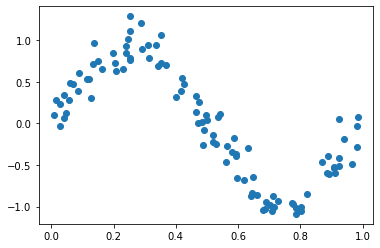

In [6]:
import matplotlib.pyplot as plt
plt.scatter(real_X, real_y)

In [7]:
import pandas as pd
df = pd.DataFrame(np.column_stack((real_X, real_y)))
df.columns = ['X', 'y']

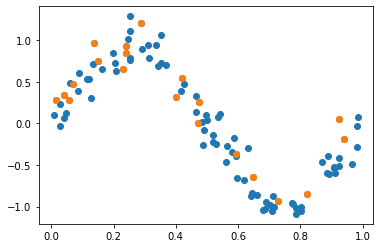

In [10]:
sample = df.sample(20) # observation 중 20 개를 무작위로 추출
plt.scatter(real_X, real_y)
plt.scatter(sample['X'], sample['y'])

In [13]:
sample=sample.sort_values(by=['X']) # 샘프링된 데이터를 X 축에 따라서 정렬
X=sample['X']
y=sample['y']
X

50    0.015113
21    0.041395
92    0.056003
88    0.068289
42    0.136084
18    0.150798
45    0.228515
63    0.239832
95    0.240517
51    0.289213
79    0.401675
69    0.420326
27    0.472571
99    0.473734
6     0.592846
30    0.648528
85    0.728860
9     0.821434
60    0.924904
89    0.941413
Name: X, dtype: float64

# 1차 회귀

## 샘플링된 데이터에 대하여 회귀

In [14]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [15]:
X=np.array(X).reshape(-1,1) # 1열인 2차원 X (1개일 때만 ??)
reg.fit(X,y)

LinearRegression()

In [16]:
y_pred = reg.predict(X)

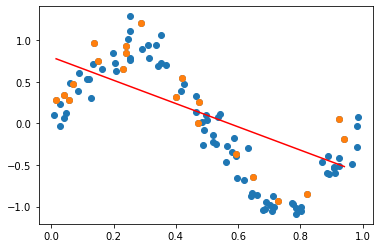

In [17]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

In [20]:
print(mean_squared_error(y,y_pred))
r2_score(y, y_pred)

0.17943467043871492


0.4798777418621615

## 2차항이 포함된 식으로 변경하기

In [21]:
from sklearn.preprocessing import PolynomialFeatures
# degree ( 제곱한 X, 2차식으로 표현)
poly = PolynomialFeatures(degree=2,include_bias=False)
X_2=poly.fit_transform(X)
X_2

array([[1.51130536e-02, 2.28404390e-04],
       [4.13950214e-02, 1.71354780e-03],
       [5.60025587e-02, 3.13628658e-03],
       [6.82890212e-02, 4.66339042e-03],
       [1.36084205e-01, 1.85189110e-02],
       [1.50797838e-01, 2.27399880e-02],
       [2.28515473e-01, 5.22193215e-02],
       [2.39832005e-01, 5.75193905e-02],
       [2.40516596e-01, 5.78482329e-02],
       [2.89212979e-01, 8.36441470e-02],
       [4.01674999e-01, 1.61342805e-01],
       [4.20326378e-01, 1.76674264e-01],
       [4.72571447e-01, 2.23323772e-01],
       [4.73734145e-01, 2.24424040e-01],
       [5.92846149e-01, 3.51466556e-01],
       [6.48528347e-01, 4.20589016e-01],
       [7.28859571e-01, 5.31236275e-01],
       [8.21433962e-01, 6.74753753e-01],
       [9.24904073e-01, 8.55447544e-01],
       [9.41413212e-01, 8.86258836e-01]])

In [22]:
reg.fit(X_2,y)


LinearRegression()

In [23]:
y_pred=reg.predict(X_2)


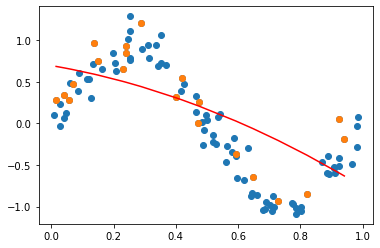

In [24]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

In [ ]:
mean_squared_error(y,y_pred)

## 3차식

In [25]:
poly = PolynomialFeatures(degree=3,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)
y_pred=reg.predict(X_temp)
mean_squared_error(y,y_pred)

0.025215964260271277

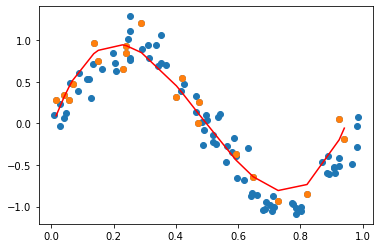

In [26]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

## 8차식

In [27]:
poly = PolynomialFeatures(degree=8,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)
y_pred=reg.predict(X_temp)
mean_squared_error(y,y_pred)

0.018334520739897144

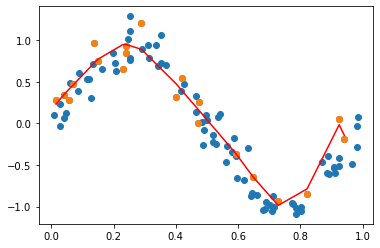

In [28]:
plt.scatter(real_X,real_y)
plt.scatter(X,y)
plt.plot(X,y_pred,color='red')

## 유연성이 좋은 모델이 반드시 좋은가?

In [29]:
true_mse = [] # 학습된 모형이 실제 모든 데이터를 얼마나 잘 맞추느냐
train_mse = [] # 학습된 데이터를 모델이 얼마나 잘 맞추느냐
for i in range(1,8):
    sample=df.sample(20)
    sample=sample.sort_values(by=['X'])
    X=sample['X']
    y=sample['y']
    X=np.array(X).reshape(-1,1)    
    poly = PolynomialFeatures(degree=i,include_bias=False)    
    X_temp = poly.fit_transform(X)
    reg.fit(X_temp,y)
    y_pred=reg.predict(X_temp) # 학습된 데이터를 가지고 예측
    train_mse.append(mean_squared_error(y,y_pred))# 학습된 데이터를 모델이 얼마나 잘맞추는지
    real_X_transformed =  poly.fit_transform(real_X.reshape(-1,1)) # real_X 데이터 전체를 변환
    true_mse.append(mean_squared_error(real_y,reg.predict(real_X_transformed)))

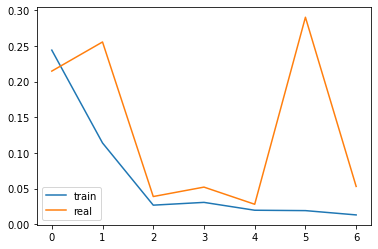

In [30]:
plt.plot(train_mse,label='train')
plt.plot(true_mse,label='real')
plt.legend()


train 데이터에만 너무 fit 된 모델이 만들어지기 때문에 다른 예측값이 들어왔을 떄 제대로 표현 못 하는 모델이 만들어 질 수 있다.

# 일반화와 과적합 분류

In [32]:
import pandas as pd
import matplotlib.pyplot as plt


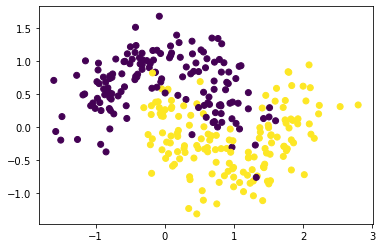

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/tonyfischetti/InteractiveLogisticRegression/master/moons.csv')
plt.scatter(df['X1'],df['X2'],c=df['Y'])


## 클래스에 따라 색 구분

In [47]:
sample=df.sample(30)
X=sample[['X1','X2']]
y=sample['Y']

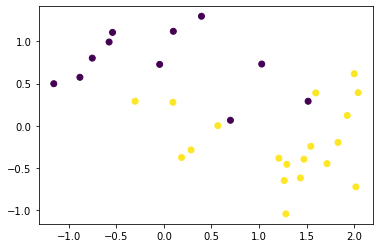

In [48]:
plt.scatter(X['X1'],X['X2'],c=y)


In [39]:
from sklearn.linear_model import LogisticRegression
reg = LinearRegression()

In [51]:
reg.fit(X, y)

LinearRegression()

In [52]:
x1_min = df['X1'].min()
x1_max = df['X1'].max()
x2_min = df['X2'].min()
x2_max = df['X2'].max()

In [53]:
import numpy as np
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_bound=np.column_stack((x1_grid.ravel(),x2_grid.ravel()))
y_bound=reg.predict(X_bound)
y_bound=y_bound.reshape(x1_grid.shape)

/usr/local/Caskroom/miniconda/base/envs/da/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


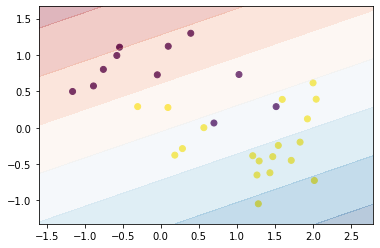

In [54]:
plt.scatter(X['X1'],X['X2'],c=y)
cs = plt.contourf(x1_grid, x2_grid, y_bound, cmap='RdBu',alpha=0.3)

## 2차원

In [55]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
X_temp=poly.fit_transform(X)
reg.fit(X_temp,y)

LinearRegression()

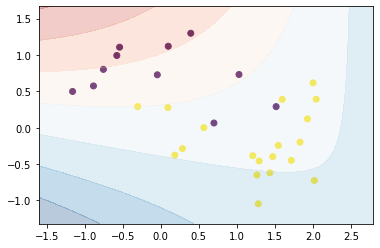

In [56]:
x1_grid, x2_grid = np.meshgrid(np.arange(x1_min, x1_max, 0.01), np.arange(x2_min, x2_max, 0.01))
X_bound=np.column_stack((x1_grid.ravel(),x2_grid.ravel()))
poly=PolynomialFeatures(degree=2,include_bias=False)
y_bound=reg.predict(poly.fit_transform(X_bound))
y_bound=y_bound.reshape(x1_grid.shape)
plt.scatter(X['X1'],X['X2'],c=y)
plt.contourf(x1_grid, x2_grid, y_bound, cmap='RdBu',alpha=0.3)

## 유연성이 좋은 모델이 진짜 좋은가

In [59]:
from sklearn.metrics import accuracy_score

real_X = df[['X1','X2']]
real_y = df['Y']
true_acc = [] # 학습된 모형이 실제 데이터를 얼마나 잘 맞추는지 기록( accuracy를 기준으로)
train_acc = [] # 학습된 데이터를 얼마나 잘 나타내는지 기록( accuracy를 기준으로)
for i in range(1,15):
    
    sample=df.sample(30)
    X=sample[['X1','X2']]
    y=sample['Y']    
    
    poly = PolynomialFeatures(degree=i,include_bias=False)    
    X_temp = poly.fit_transform(X)
    reg.fit(X_temp,y)
    
    y_pred=reg.predict(X_temp) # 학습된 데이터를 이용하여 예측
    train_acc.append(accuracy_score(y,y_pred)) # 학습에 사용된 데이터 정확도
    
    real_X_transformed =  poly.fit_transform(real_X) 
    true_acc.append(accuracy_score(real_y,reg.predict(real_X_transformed))) # 모든 데이터에 대한 정ㅊ확도

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [ ]:
plt.plot(train_acc,label='train')
plt.plot(true_acc,label='real')
plt.legend()